In [1]:
!pip install altair vega_datasets

In [2]:
import pandas as pd
import altair as alt

In [3]:
!ls

Cifar10               attention.sh          mobilenet-features.sh
Feature_Json.py       clean_test.sh         teacher_train.py
KD_Json.py            corte.csv             teacher_train.sh
KD_distillation.py    docs                  test.sh
Mnist                 exp4.sh               todo.csv
Mnist_experiment.py   feat_distillation.py  untitled.txt
ResNet_autoencoder.py hint.sh
Viz.ipynb             lib


# Destilacion de ultima capa

In [21]:



def plot_KD(data,phase="test"):
    
    detalle=['test_acc', 'test_teacher/acc', 'test_loss', 'test_eval',
           'train_acc', 'train_teacher/acc', 'train_loss', 'train_eval','distillation', 'temp']
    
    bar=alt.Chart(data).mark_point().encode(
        alt.X('temp:O', scale=alt.Scale(zero=False,base=10,type='log', )),
        alt.Y('%s_acc'%phase, scale=alt.Scale(zero=False, padding=1,)),
        shape='distillation',
        color='student',
        tooltip=detalle
    ).interactive()

    rule = alt.Chart(data).mark_rule(color='blue').encode(
        y='mean(%s_teacher/acc):Q'%phase
    )
    rule = alt.Chart(data).mark_rule(color='red').encode(
        y='mean(%s_teacher/acc):Q'%phase
    )



    return(bar + rule).properties(width=600,height=400)

def get_data(folder):
    data = pd.read_csv(folder+"/summary.csv") 
    if "temp" not in data.columns:
        d_arr=[d.split(",")[0] for d in data["distillation"]]
        t_arr=[float(d.split(",T-")[1]) for d in data["distillation"]]
        data["distillation"]=d_arr
        data["temp"]=t_arr
    data=data[data["student"]!="EfficientNetB0"]
    return data

def load_and_plot_KD(folder="./Cifar10/ResNet101/exp1/students", phase="test"):
    data=get_data(folder)
    return plot_KD(data,phase=phase)



In [5]:
load_and_plot_KD(folder="./Cifar10/ResNet101/exp1/students")

alt.LayerChart(...)

In [6]:
load_and_plot_KD(folder="./Cifar10/ResNet101/exp2/students")

alt.LayerChart(...)

In [7]:
load_and_plot_KD(folder="./Cifar10/ResNet101/exp3/students")

alt.LayerChart(...)

## Destilacion con features usando KD

In [36]:
!ls Cifar10/ResNet101/students

MobileNet-KD    MobileNet-KDCE  ResNet18-KD     ResNet18-KDCE   ResNet18-random


In [133]:
import altair as alt

folder="./Cifar10/ResNet101/students/"
mid_folders="MobileNet-KD       MobileNet-KDCE  ResNet18-KD     ResNet18-KDCE".split()
ce_test_acc={'MobileNet':87.8,
             'ResNet18':90.58}
ce_train_acc={'MobileNet':95.73,
             'ResNet18':98.15}
source = pd.concat([pd.read_csv(folder+mid_folder+"/summary.csv") for mid_folder in mid_folders])


source=source.fillna(1)

if correct_layers:

    source['layer']=[row['layer']-2 if row['student']=="ResNet18" else row['layer'] for i,row in source.iterrows()]
    source['last_layer']=['KD' if row['last_layer']==1 else row['last_layer'] for i,row in source.iterrows()]
    source['last_layer']=['KD-CE' if row['last_layer']=='KD_CE' else row['last_layer'] for i,row in source.iterrows()]
    source['last_layer']=['KD-CE' if row['last_layer']=='KDCE,T-8' else row['last_layer'] for i,row in source.iterrows()]
    source['last_layer']=['KD' if row['last_layer']=='KD,T-8' else row['last_layer'] for i,row in source.iterrows()]
    source.to_csv('todo.csv')

source['student last_layer']=[row['student']+","+row['last_layer'] for i,row in source.iterrows()]
source['student_CE_train_Acc']=[ce_test_acc[row['student']] for i,row in source.iterrows()]
source['student_CE_test_Acc']=[ce_test_acc[row['student']] for i,row in source.iterrows()]


/Users/jpcosec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [141]:

def plot_acc(phase="test"):

    
    detalle=["student","teacher","distillation","layer",'last_layer','test_acc','train_acc',
             'train_loss','epoch',"student_CE_%s_Acc"%phase]#,"lambda"]
    
    
    bar=alt.Chart(source).mark_point().encode(
        alt.X('layer:O', scale=alt.Scale(zero=False,padding=1)),
        alt.Y('%s_acc'%phase, scale=alt.Scale(zero=False, padding=1)),
        color=alt.Color('student last_layer'),
        shape='distillation',
        tooltip=detalle
    ).interactive()


    rule1 = alt.Chart(source).mark_rule(color='blue').encode(
        y='mean(%s_teacher/acc):Q'%phase
    )
    rule2 = alt.Chart(source).mark_rule(color='red').encode(
        y='mean(student_CE_%s_Acc):Q'%phase
    )

    return (bar + rule1 + rule2).properties(width=600,height=400)
    
plot_acc()

alt.LayerChart(...)

In [144]:
plot_acc("train")

alt.LayerChart(...)

In [150]:

def plot_acc(phase="test",filter=None):

    
    detalle=["student","teacher","distillation","layer",'last_layer','test_acc','train_acc',
             'train_loss','epoch',"student_CE_%s_Acc"%phase]#,"lambda"]
    
    if filter is not None:
        S= source[source[filter[0]].isin(filter[1])]
    else:
        S=source
        
    bar=alt.Chart(S).mark_point().encode(
        alt.X('layer:O', scale=alt.Scale(zero=False,padding=1)),
        alt.Y('%s_acc'%phase, scale=alt.Scale(zero=False, padding=1)),
        color=alt.Color('student last_layer'),
        shape='distillation',
        tooltip=detalle
    ).interactive()


    rule1 = alt.Chart(source).mark_rule(color='blue').encode(
        y='mean(%s_teacher/acc):Q'%phase
    )
    rule2 = alt.Chart(source).mark_rule(color='red').encode(
        y='mean(student_CE_%s_Acc):Q'%phase
    )

    return (bar + rule1 + rule2).properties(width=600,height=400)
    
plot_acc(filter=('student',['ResNet18']))

alt.LayerChart(...)

In [17]:
def plot_gen(field="eval",phase="test"):

    
    detalle=["student","teacher","distillation","layer","lambda"]

    bar=alt.Chart(source).mark_point().encode(
        alt.X('layer', scale=alt.Scale(zero=False,padding=1)),
        alt.Y('%s_%s'%(phase,field), scale=alt.Scale(zero=False, padding=1)),
         color=alt.Color('lambda:Q', bin=alt.Bin(maxbins=3),  scale=alt.Scale(scheme="plasma" )),
        shape='distillation',
        tooltip=detalle
    ).interactive()


    return bar

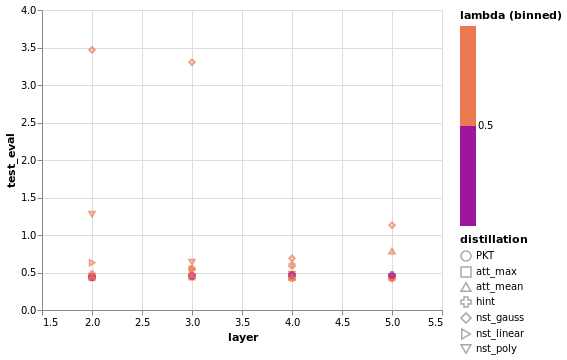

In [18]:
plot_gen()

In [152]:
source.head()

,Unnamed: 0,distillation,epoch,epochs,lambda,last_layer,layer,lr,pre,resume,...,test_loss,test_teacher/acc,train_acc,train_batch_size,train_eval,train_loss,train_teacher/acc,student last_layer,student_CE_train_Acc,student_CE_test_Acc
0,0,PKT,90,100,1.0,KD,3,0.01,50,False,...,0.003339,90.68,95.622,128,0.166026,0.001806,98.238,"MobileNet,KD",87.8,87.8
1,1,PKT,95,100,1.0,KD,1,0.01,50,False,...,0.003597,90.68,95.444,128,0.177137,0.001846,98.260,"MobileNet,KD",87.8,87.8
2,2,PKT,92,100,1.0,KD,0,0.01,50,False,...,0.003312,90.68,95.658,128,0.165046,0.001797,98.240,"MobileNet,KD",87.8,87.8
3,3,PKT,81,100,1.0,KD,2,0.01,50,False,...,0.003313,90.68,95.598,128,0.165880,0.001795,98.250,"MobileNet,KD",87.8,87.8
4,4,hint,99,100,1.0,KD,3,0.01,50,False,...,141351.086406,90.68,91.750,128,0.354643,105205.985794,98.238,"MobileNet,KD",87.8,87.8
